# Import

In [2]:
import csv
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from nltk import word_tokenize
from tqdm import tqdm

## Add configuration file

In [3]:
sys.path.append("/home/jovyan/core/config/")

In [4]:
from ALL import config 

## Set condition

In [5]:
tqdm.pandas()
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 50)

# Read data

In [6]:
newsgroups_df = pd.read_csv("../../../Preprocessing/data/20News/master.csv", index_col=0)

In [7]:
with open("../../../Preprocessing/data/20News/class.csv", mode="r") as f:
    reader = csv.reader(f)
    class_labels = [label for label in reader]

# word count

In [8]:
newsgroups_df["words"] = newsgroups_df.words.progress_apply(lambda x: word_tokenize(x))
newsgroups_df["words_nonstop"] = newsgroups_df.words_nonstop.progress_apply(lambda x: word_tokenize(x))

100%|██████████| 18846/18846 [00:15<00:00, 1223.77it/s]


In [10]:
newsgroups_df["words_length"] = newsgroups_df.words.progress_apply(lambda x: len(x))
newsgroups_df["words_nonstop_length"] = newsgroups_df.words_nonstop.progress_apply(lambda x: len(x))

100%|██████████| 18846/18846 [00:00<00:00, 535243.65it/s]


<AxesSubplot: xlabel='words_length', ylabel='Count'>

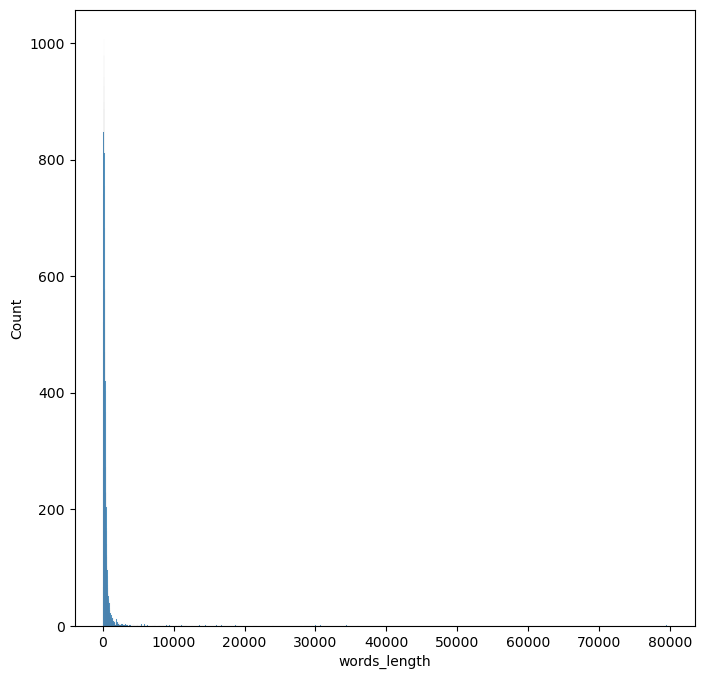

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
sns.histplot(data=newsgroups_df["words_length"], ax=ax)

In [12]:
newsgroups_df["words_length"].describe()

count    18846.000000
mean       406.420301
std       1271.690949
min         17.000000
25%        150.000000
50%        241.500000
75%        390.000000
max      79563.000000
Name: words_length, dtype: float64

In [13]:
newsgroups_df["words_length"].quantile(0.996)

6135.299999999985

In [14]:
newsgroups_df[
    newsgroups_df["words_length"] > newsgroups_df["words_length"].quantile(0.996)
].index

Int64Index([  492,   654,  1350,  1800,  1948,  2104,  2528,  2694,  2808,
             2835,  3059,  3372,  3467,  3488,  3493,  3646,  3958,  4136,
             4205,  4325,  4372,  4716,  4721,  4793,  4867,  5017,  5274,
             5396,  5665,  5925,  6400,  6639,  6656,  6872,  7829,  7946,
             8300,  8452,  8709,  8906,  9065,  9443,  9683, 10085, 10373,
            10540, 10722, 11166, 11244, 11788, 11923, 12042, 12650, 13035,
            13043, 13292, 13356, 13483, 14002, 14201, 14472, 15076, 15132,
            15280, 15568, 15641, 16217, 16406, 16837, 16868, 16952, 17014,
            18102, 18321, 18415, 18730],
           dtype='int64')